In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arulesviz as av
import json
from itertools import combinations

# Exploratory Data Analysis

In [33]:
baskets = pd.read_csv("../data/interim/selected_sales_features.csv")
baskets

,transaction_date,transaction_time,transaction_qty,store_id,product_type
0,2023-01-01,07:06:11,2,5,Gourmet brewed coffee
1,2023-01-01,07:08:56,2,5,Brewed Chai tea
2,2023-01-01,07:14:04,2,5,Hot chocolate
3,2023-01-01,07:20:24,1,5,Drip coffee
4,2023-01-01,07:22:41,2,5,Brewed Chai tea
...,...,...,...,...,...
149111,2023-06-30,20:18:41,2,8,Brewed herbal tea
149112,2023-06-30,20:25:10,2,8,Brewed Black tea
149113,2023-06-30,20:31:34,1,8,Brewed herbal tea
149114,2023-06-30,20:57:19,1,8,Barista Espresso


In [34]:
product_quantities = baskets.groupby('product_type')["transaction_qty"].sum() # [["product_type", "transaction_qty"]].apply(list).tolist()
product_quantities.head()

product_type
Barista Espresso    24943
Biscotti             5788
Black tea             303
Brewed Black tea    17462
Brewed Chai tea     26250
Name: transaction_qty, dtype: int64

### Raw Data Distribution

Bar charts showing product frequencies.

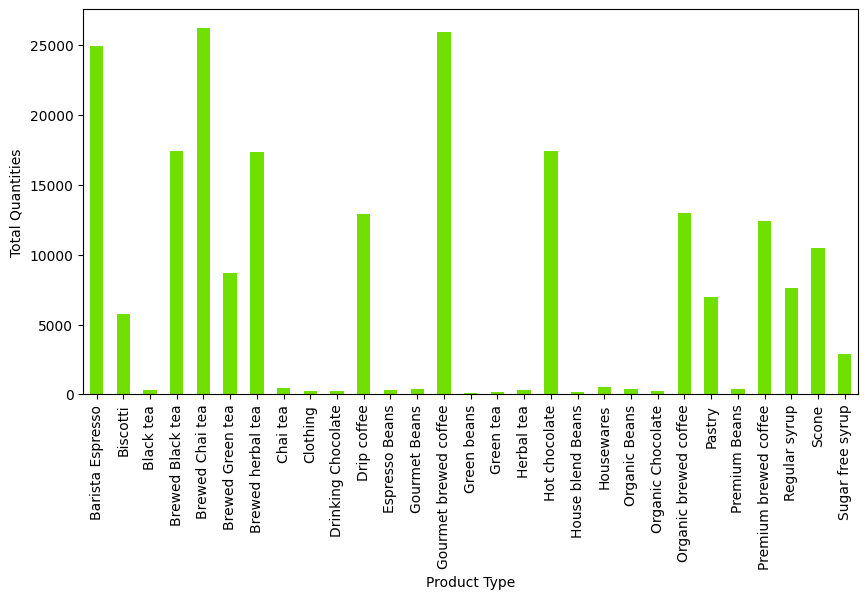

In [35]:
product_quantities.plot.bar(
    figsize=(10,5),
    color="#70e000")

plt.xlabel("Product Type")
plt.ylabel("Total Quantities")
plt.show()

### Preprocessed Data

Histogram of transaction sizes.

In [36]:
with open("../data/processed/basket_item_sets.json") as baskets_file:
    baskets = json.load(baskets_file)

baskets[:5]

[['Gourmet brewed coffee'],
 ['Brewed Chai tea'],
 ['Hot chocolate'],
 ['Drip coffee'],
 ['Brewed Chai tea', 'Scone']]

In [37]:
itemset_sizes = [len(itemset) for itemset in baskets]
itemset_sizes[:5]

[1, 1, 1, 1, 2]

<Axes: ylabel='Count'>

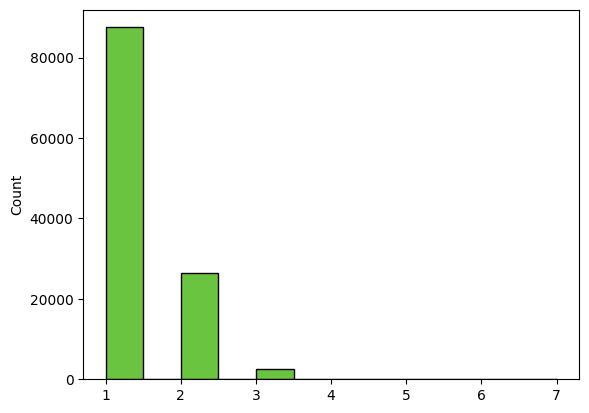

In [38]:
sns.histplot(x=itemset_sizes, binwidth=0.5, color="#38b000")

### Correlation Heatmap

We need to study the correlation of **products** that are frequently bought together.

For this task, we followed the following procedure:
1. extract distinct products to construct the square matrix
2. iterate over all itemsets and count frequencies following **co-occurence**
3. populate the diagonal with a dummy value (in this case **1**) to avoid it overshadowing other features
4. normalize values for easier comporehension according to the **maximum** for each feature

In [96]:
# Get unique items
unique_items = sorted(set(item for basket in baskets for item in basket))

# Initialize co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

# Fill co-occurrence matrix
for basket in baskets:
    for item1, item2 in combinations(basket, 2):
        co_occurrence_matrix.loc[item1, item2] += 1
        co_occurrence_matrix.loc[item2, item1] += 1

# Diagonal counts
for basket in baskets:
    for item in basket:
        co_occurrence_matrix.loc[item, item] += 1

# Normalize by row maximums
row_max = co_occurrence_matrix.max(axis=1)
normalized_by_max = np.round(co_occurrence_matrix.div(row_max, axis=0), decimals=2)

<Axes: >

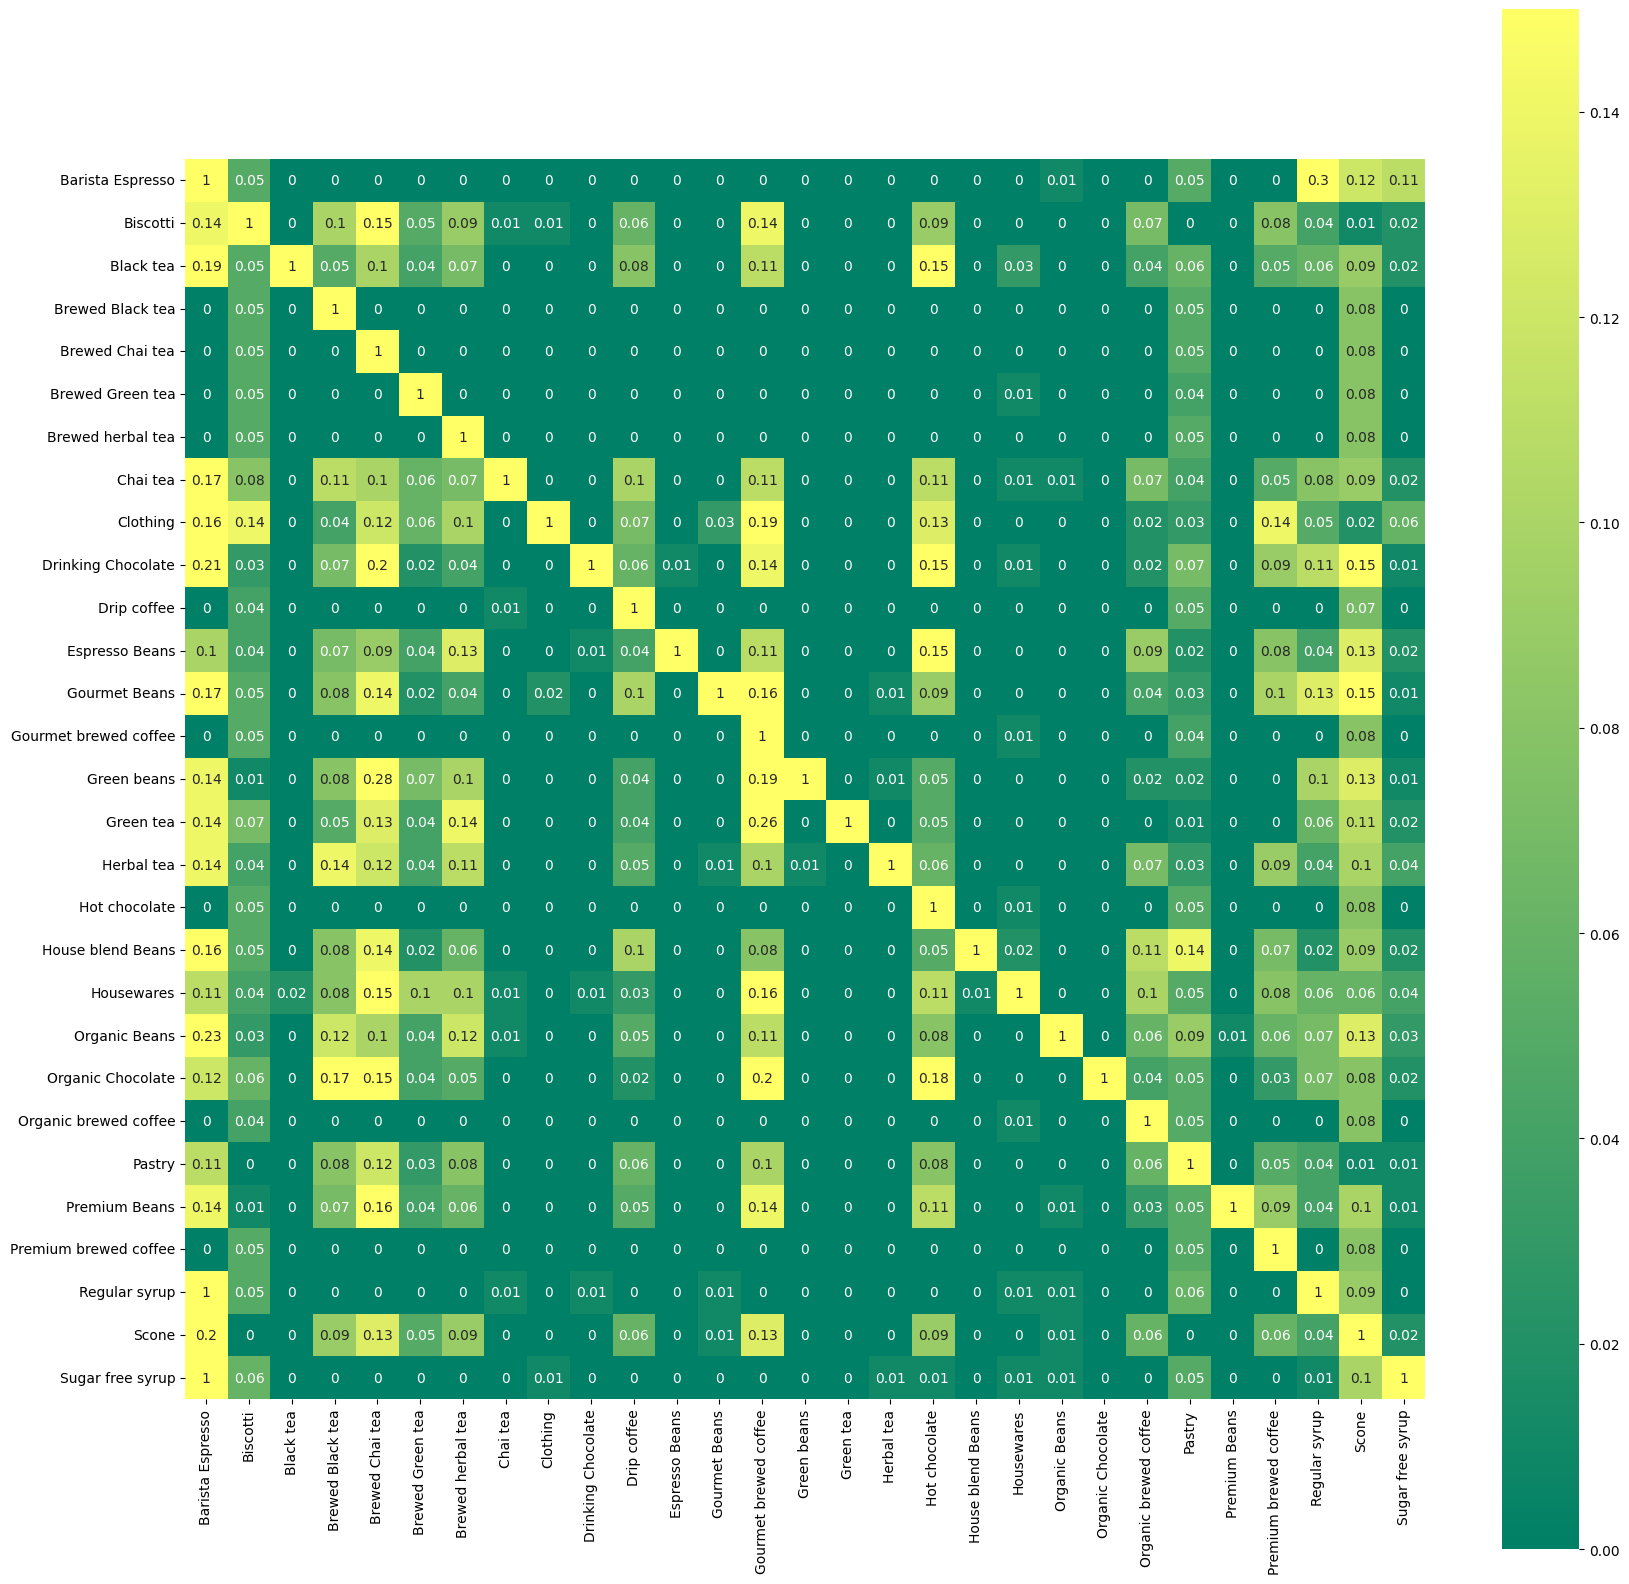

In [99]:
plt.figure(figsize=(20, 20))
sns.heatmap(normalized_by_max, vmin=0, vmax=0.15, cmap="summer", annot=True, square=True)